In [62]:
import os
import pandas as pd 
import numpy as np 
from typing import Dict, List, Tuple 
import sqlite3
import json
import glob
import matplotlib.pyplot as plt

In [3]:
df_data = pd.DataFrame()
file_list = ['20data/' + i for i in os.listdir('20data/')]
dfs = [] # an empty list to store the data frames
file_list

['20data/airlines-1558527599826.json',
 '20data/airlines-1558546003827.json',
 '20data/airlines-1558611772040.json',
 '20data/airlines-1558623303180.json',
 '20data/airlines-1558678330070.json',
 '20data/airlines-1558697205154.json',
 '20data/airlines-1558744391657.json',
 '20data/airlines-1558779687636.json',
 '20data/airlines-1558863520888.json',
 '20data/airlines-1558888297881.json',
 '20data/airlines-1558974571041.json',
 '20data/airlines-1558998029487.json',
 '20data/airlines-1559069822287.json',
 '20data/airlines-1559097885748.json',
 '20data/airlines-1559142170524.json',
 '20data/airlines-1559156713030.json',
 '20data/airlines-1559231904332.json',
 '20data/airlines-1559256655329.json',
 '20data/airlines-1559323725358.json',
 '20data/airlines-1559352498975.json']

In [4]:
# load the json file of one month onto dataframe 
# df_data = pd.read_json('../data/airlines-1558527599826.json', lines=True)
for file in file_list:
    try:
        data = pd.read_json(file, lines=True) # read data frame from json file 
        print(file)
        dfs.append(data) # append the data frame to the list
    except:
        pass
df_data = pd.concat(dfs, ignore_index=True) # concatenate all the data frames in the list.

20data/airlines-1558527599826.json
20data/airlines-1558546003827.json
20data/airlines-1558678330070.json
20data/airlines-1558697205154.json
20data/airlines-1558744391657.json
20data/airlines-1558779687636.json
20data/airlines-1558863520888.json
20data/airlines-1558888297881.json
20data/airlines-1558974571041.json
20data/airlines-1558998029487.json
20data/airlines-1559069822287.json
20data/airlines-1559097885748.json
20data/airlines-1559142170524.json
20data/airlines-1559156713030.json
20data/airlines-1559231904332.json
20data/airlines-1559256655329.json
20data/airlines-1559323725358.json
20data/airlines-1559352498975.json


In [10]:
len(df_data.index)

255153

In [74]:
df_datas = df_data.dropna(subset = ["user"])
#Extract only tweets made by KLM (including posting +replying to other):
test = df_datas.copy()

ind = []
for index, row in df_datas.iterrows():
    if row['user']['id_str'] == '56377143':
        ind.append(index)
klm_tweet = df_datas.loc[ind]
klm_tweet

,created_at,id,id_str,text,display_text_range,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,filter_level,lang,timestamp_ms,retweeted_status,extended_tweet,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,delete
36,2019-05-22 12:23:03+00:00,1.131174e+18,1.131174e+18,@Pelusitaaaa1 Hoi! Enkel KLM/Air France-vluch...,"[14, 140]","<a href=""http://www.salesforce.com"" rel=""nofol...",1.0,1.131171e+18,1.131171e+18,3.110269e+09,...,low,nl,2019-05-22 12:23:03.108,NaN,{'full_text': '@Pelusitaaaa1 Hoi! Enkel KLM/A...,NaN,NaN,NaN,NaN,NaN
635,2019-05-22 13:09:16+00:00,1.131185e+18,1.131185e+18,@Pelusitaaaa1 We helpen je graag. Kan je ons e...,"[14, 107]","<a href=""http://www.salesforce.com"" rel=""nofol...",0.0,1.131183e+18,1.131183e+18,3.110269e+09,...,low,nl,2019-05-22 13:09:16.877,NaN,NaN,NaN,NaN,NaN,NaN,NaN
785,2019-05-22 13:20:05+00:00,1.131188e+18,1.131188e+18,@addblackman We understand that you would pref...,"[13, 140]","<a href=""http://www.salesforce.com"" rel=""nofol...",1.0,1.131182e+18,1.131182e+18,1.604219e+09,...,low,en,2019-05-22 13:20:05.252,NaN,{'full_text': '@addblackman We understand that...,NaN,NaN,NaN,NaN,NaN
788,2019-05-22 13:20:17+00:00,1.131188e+18,1.131188e+18,@CarlosMosig Con el fin de evitar errores noso...,"[13, 140]","<a href=""http://www.salesforce.com"" rel=""nofol...",1.0,1.131183e+18,1.131183e+18,8.794935e+17,...,low,es,2019-05-22 13:20:17.115,NaN,{'full_text': '@CarlosMosig Con el fin de evit...,NaN,NaN,NaN,NaN,NaN
791,2019-05-22 13:20:31+00:00,1.131188e+18,1.131188e+18,@addblackman We do understand that some passen...,"[13, 140]","<a href=""http://www.salesforce.com"" rel=""nofol...",1.0,1.131182e+18,1.131182e+18,1.604219e+09,...,low,en,2019-05-22 13:20:31.611,NaN,{'full_text': '@addblackman We do understand t...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254941,2019-06-02 08:11:31+00:00,1.135097e+18,1.135097e+18,@UreshaM There are items that may not be carri...,"[9, 140]","<a href=""http://www.salesforce.com"" rel=""nofol...",1.0,1.135095e+18,1.135095e+18,5.381298e+08,...,low,en,2019-06-02 08:11:31.789,NaN,{'full_text': '@UreshaM There are items that m...,NaN,NaN,NaN,NaN,NaN
254956,2019-06-02 08:12:27+00:00,1.135097e+18,1.135097e+18,@SuzanneMedows Our sincere apologies for the d...,"[15, 140]","<a href=""http://www.salesforce.com"" rel=""nofol...",1.0,1.135095e+18,1.135095e+18,3.337513e+09,...,low,en,2019-06-02 08:12:27.775,NaN,{'full_text': '@SuzanneMedows Our sincere apol...,NaN,NaN,NaN,NaN,NaN
254980,2019-06-02 08:14:57+00:00,1.135097e+18,1.135097e+18,@TimKro We would like to help you with reservi...,"[8, 140]","<a href=""http://www.salesforce.com"" rel=""nofol...",1.0,1.135095e+18,1.135095e+18,1.918871e+06,...,low,en,2019-06-02 08:14:57.223,NaN,{'full_text': '@TimKro We would like to help y...,NaN,NaN,NaN,NaN,NaN
255082,2019-06-02 08:23:32+00:00,1.135100e+18,1.135100e+18,@UreshaM The final check will still be done at...,"[9, 70]","<a href=""http://www.salesforce.com"" rel=""nofol...",0.0,1.135098e+18,1.135098e+18,5.381298e+08,...,low,en,2019-06-02 08:23:32.612,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:

idx = []
for index, row in klm_tweet.iterrows():
    if np.isnan(row["in_reply_to_user_id_str"])== True:
        idx.append(index)

klm_post = klm_tweet.loc[idx]
klm_post = klm_post.drop_duplicates(subset=["id"])
klm_post

,created_at,id,id_str,text,display_text_range,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,filter_level,lang,timestamp_ms,retweeted_status,extended_tweet,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,delete
68411,2019-05-26 07:56:16+00:00,1.132556e+18,1.132556e+18,There’s a place called Kokomo.. 🎶💙 https://t.c...,"[0, 34]","<a href=""http://twitter.com/download/iphone"" r...",0.0,NaN,NaN,NaN,...,low,en,2019-05-26 07:56:16.065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96828,2019-05-27 16:02:20+00:00,1.133041e+18,1.133041e+18,From frying to flying 🍟 ➡️ ✈️ 10 things you ne...,NaN,"<a href=""http://www.salesforce.com"" rel=""nofol...",0.0,NaN,NaN,NaN,...,low,en,2019-05-27 16:02:20.506,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96931,2019-05-27 16:09:06+00:00,1.133042e+18,1.133042e+18,From frying to flying 🍟 ➡️ ✈️ 10 things you ne...,"[0, 113]","<a href=""http://www.salesforce.com"" rel=""nofol...",0.0,NaN,NaN,NaN,...,low,en,2019-05-27 16:09:06.430,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203110,2019-05-31 08:52:54+00:00,1.134382e+18,1.134382e+18,To our amazing crew around the world: Happy In...,"[0, 84]","<a href=""https://mobile.twitter.com"" rel=""nofo...",0.0,NaN,NaN,NaN,...,low,en,2019-05-31 08:52:54.218,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:

#DROP THE DUPLICATE FROM THE BEGINNING + COLUMN SO IT WONT TAKE TIMES LOADING 
df_counting = test[["id","text","in_reply_to_user_id_str","user"]]
df_counting = df_counting.drop_duplicates(subset=["id"])
df_counting

,id,text,in_reply_to_user_id_str,user
0,1.131173e+18,La ruta de easyJet entre Londres y Menorca tra...,NaN,"{'id': 393374091, 'id_str': '393374091', 'name..."
1,1.131173e+18,RT @bttr_as1: @goody_tracy Here’s a list of so...,NaN,"{'id': 3420691215, 'id_str': '3420691215', 'na..."
2,1.131173e+18,@British_Airways,394376606.0,"{'id': 394376606, 'id_str': '394376606', 'name..."
3,1.131173e+18,RT @TheRaceRadio: Nice change by @AmericanAir....,NaN,"{'id': 36488556, 'id_str': '36488556', 'name':..."
4,1.131173e+18,RT @sandeeprrao1991: BREAKING:-\nKLM to fly 3x...,NaN,"{'id': 14193348, 'id_str': '14193348', 'name':..."
...,...,...,...,...
255148,1.135101e+18,RT @Jefferson_MFG: Derby's Rolls-Royce has won...,NaN,"{'id': 371347123, 'id_str': '371347123', 'name..."
255149,1.135101e+18,"Also, got my “call back” from @AmericanAir cus...",50015771.0,"{'id': 50015771, 'id_str': '50015771', 'name':..."
255150,1.135102e+18,Listen to our curated audio playlists on KrisW...,NaN,"{'id': 253340062, 'id_str': '253340062', 'name..."
255151,1.135102e+18,@6BillionPeople We're sure whichever seat he h...,33923443.0,"{'id': 22536055, 'id_str': '22536055', 'name':..."


In [138]:
#LIST OF THINGS TO PLAY WITH THE DATA

KLM = "56377143" 
AirFra = "106062176" 
BriAir = "18332190" 
AmerAir = "22536055" 
Lufh = "124476322" 
AirBer = "26223583" 
AirBeras = "2182373406" 
ezJet = "38676903" 
RyanAir = "1542862735" 
SingAir = "253340062" 
Qantas = "218730857" 
EtiAir = "45621423" 
VirAtl = "20626359" 

airline_list = [KLM,AirFra,BriAir,AmerAir,Lufh,ezJet,RyanAir,SingAir,Qantas,EtiAir,VirAtl]
tag_list = ["@KLM","@AirFrance","@British_Airways","@AmericanAir","@Lufthansa","@easyJet","@SingaporeAir","@Qantas","@EtihadAirways","@VirginAtlantic"]

In [131]:

#SOME FUNCTION TO CALCULATE THINGS ANYONE HAVE TIME CAN CLEAN IT SO IT LOOKS MORE NEAT

def df_tweet_total(b):
    ind = []
    for index, row in df_counting.iterrows():
        if row['user']['id_str'] == b:
            ind.append(index)
    c = df_counting.loc[ind]
    return(len(c.index))
#THE TOTAL IS THE TOTAL AMOUNT OF POST+ REPLY OF EACH AIRLINE, CAN CHANGE THE RETURN TO return(c) TO GET A DATAFRAME
    
def df_tweet_post(b):
    ind = []
    idx = []
    
    for index, row in df_counting.iterrows():
        if row['user']['id_str'] == b:
            ind.append(index)
            
    c = df_counting.loc[ind]

    for index, row in c.iterrows():
        if np.isnan(row["in_reply_to_user_id_str"])== True: #IF THIS IS NaN THEN IT'S A POST
            idx.append(index)

    tweet_post = c.loc[idx]
    return(tweet_post)

#THE POST IS THE TOTAL AMOUNT OF POST ONLY OF EACH AIRLINE, CAN CHANGE THE RETURN TO return(c) TO GET A DATAFRAME

def df_tweet_mention(b):
    ind = []
    for index, row in df_counting.iterrows():
        if b in row["text"]:
            ind.append(index)
    c = df_counting.loc[ind]
    return(len(c.index))

#THE MENTION IS THE TOTAL AMOUNT OF MENTION ONLY OF EACH AIRLINE, CAN CHANGE THE RETURN TO return(c) TO GET A DATAFRAME

In [132]:
df_tweet_mention("@KLM")

4130

In [113]:

total_counter= []

for i in airline_list:
    total_counter.append(df_tweet_total(i))
    
sum(total_counter)


14395

In [114]:
per_total_counter = [i*100/sum(total_counter) for i in total_counter]
per_total_counter

[6.405001736714137,
 1.8478638416116706,
 22.625911774921846,
 38.7009378256339,
 3.2928100034734284,
 11.233067037165682,
 5.613060090309135,
 2.4730809308787776,
 2.973254602292463,
 0.4723862452240361,
 4.362625911774922]

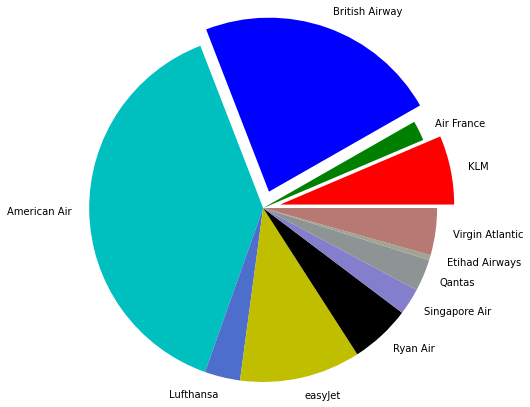

In [123]:
# I DONT KNOW HOW TO PUT THE TITLE ON THIS GRAPH, HELP ME IF YOU CAN
y = np.array(per_total_counter)
mylabels = ["KLM","Air France","British Airway","American Air","Lufthansa","easyJet","Ryan Air","Singapore Air","Qantas","Etihad Airways","Virgin Atlantic"]
myexplode = [0.2, 0, 0.2, 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0]
mycolors = ["r","g","b","c","#4d6ecc","y","k","#847fcc","#8e9493","#a0a593","#b67973"]
plt.pie(y, labels = mylabels,explode = myexplode,colors = mycolors, radius = 2)
plt.show() 

In [139]:
mention_counter= []

for i in tag_list:
    mention_counter.append(df_tweet_mention(i))
    
mention_counter



[4130, 628, 14320, 23076, 403, 5327, 1438, 2467, 2101, 3756]

In [140]:
per_men_counter = [i*100/sum(mention_counter) for i in mention_counter]
per_men_counter

[7.164417305623981,
 1.0894077646324116,
 24.84127259480276,
 40.030531173021544,
 0.6990944731637928,
 9.240884016237032,
 2.4945356139194392,
 4.279568400235923,
 3.6446587794469694,
 6.515629878916143]

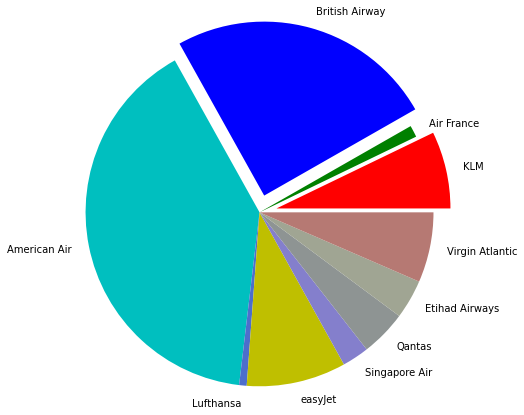

In [142]:
y2 = np.array(per_men_counter)
mylabels = ["KLM","Air France","British Airway","American Air","Lufthansa","easyJet","Singapore Air","Qantas","Etihad Airways","Virgin Atlantic"]
myexplode = [0.2, 0, 0.2, 0 , 0 , 0 , 0 , 0 , 0 , 0]
mycolors = ["r","g","b","c","#4d6ecc","y","#847fcc","#8e9493","#a0a593","#b67973"]
plt.pie(y2, labels = mylabels,explode = myexplode,colors = mycolors, radius = 2)
plt.show() 